In [14]:
import pandas as pd

df = pd.read_csv("Truncated_News_Viewership_2012-2027.csv")

df.head()

,Date,Channel,Viewership,Content Type,Anchor,Packaging,Storytelling Style,Language,Audience Age,Ad Frequency,YouTube Likes,YT Comments,Screen Clutter (UI of the news screen)
0,2012-01-01,Zee News,4.4,Politics,Anchor C,Panel Discussion,Statistical,Formal,18-25,15,479,89,0.134776
1,2012-01-02,Aaj Tak,3.8,Politics,Anchor A,Panel Discussion,Statistical,Simple,25-40,15,459,89,0.267808
2,2012-01-03,Zee News,3.8,Entertainment,Anchor A,Panel Discussion,Analytical,Complex,35-50,7,210,63,0.140884
3,2012-01-04,Aaj Tak,3.6,Entertainment,Anchor C,Detailed Analysis,Narrative,Informal,18-25,11,140,90,0.217271
4,2012-01-05,Zee News,4.4,Entertainment,Anchor E,Panel Discussion,Narrative,Simple,25-40,9,140,49,0.446593


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


x = df.drop('Viewership', axis=1) #Features
y = df['Viewership'] #Target

#Encoding

label_encoders = {}

for column in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[column] = le.fit_transform(x[column])
    label_encoders[column] = le

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train)



      Date  Channel  Content Type  Anchor  Packaging  Storytelling Style  \
1643  1643        0             0       4          0                   1   
2789  2789        0             2       2          1                   2   
3667  3667        0             0       4          3                   2   
3880  3880        1             4       3          1                   2   
4235  4235        0             3       0          3                   1   
...    ...      ...           ...     ...        ...                 ...   
3772  3772        1             1       1          0                   1   
5191  5191        0             4       4          1                   0   
5226  5226        1             1       3          2                   2   
5390  5390        1             1       0          3                   1   
860    860        1             3       0          2                   3   

      Language  Audience Age  Ad Frequency  YouTube Likes  YT Comments  \
1643         

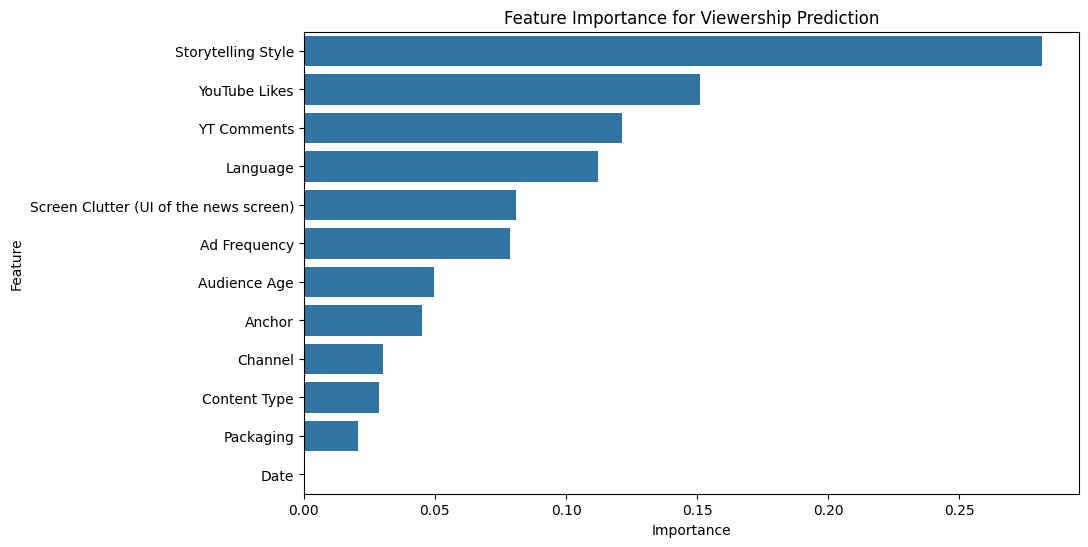

In [19]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_names = x.columns
importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y = 'Feature', data=importance_df)
plt.title('Feature Importance for Viewership Prediction')
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error (MSE): 4.5141030092923915e-29
Mean Absolute Error (MAE): 5.926634527691041e-15
R^2 Score: 1.0


In [21]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, randrom_state=42)
xgb_model.fit(x_train, y_train)

xgb_pred = xgb_model.predict(x_test)

xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

print("XGBoost Model Performance:")
print(f"Mean Squared Error (MSE): {xgb_mse}")
print(f"Mean Absolute Error (MAE): {xgb_mae}")
print(f"R^2 Score: {xgb_r2}")

XGBoost Model Performance:
Mean Squared Error (MSE): 8.8090587891546e-09
Mean Absolute Error (MAE): 7.404726320498964e-05
R^2 Score: 0.9999999875833148


[13:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "randrom_state" } are not used.



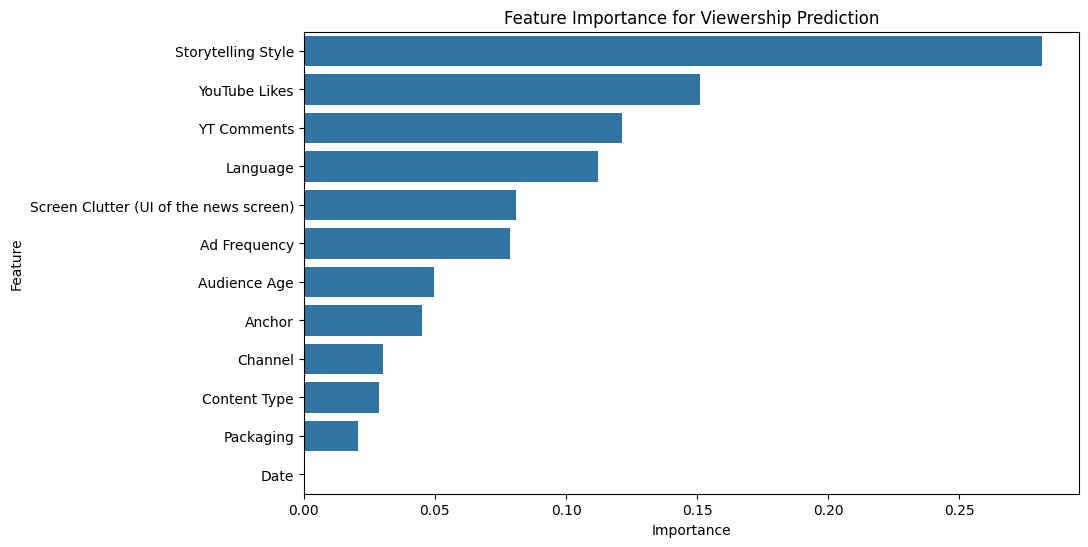

In [23]:
xgb_importances = xgb_model.feature_importances_

feature_names = x.columns
importance_df = pd.DataFrame({'Feature':feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y = 'Feature', data=importance_df)
plt.title('Feature Importance for Viewership Prediction')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

linear_pred = linear_model.predict(x_test)

linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print("\nLinear Regression Model Performance:")
print(f"Mean Squared Error (MSE): {linear_mse}")
print(f"Mean Absolute Error (MAE): {linear_mae}")
print(f"R^2 Score: {linear_r2}")


Linear Regression Model Performance:
Mean Squared Error (MSE): 0.64516710662005
Mean Absolute Error (MAE): 0.6728417134340989
R^2 Score: 0.09061375275847539


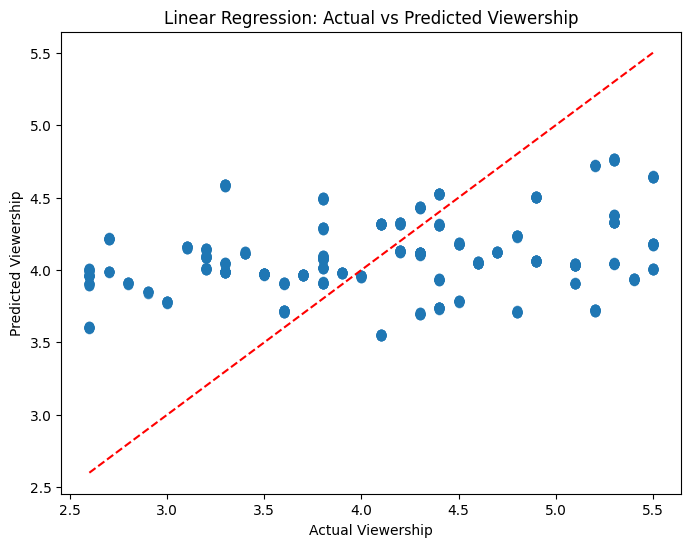

In [26]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_pred, alpha=0.7)
plt.xlabel('Actual Viewership')
plt.ylabel('Predicted Viewership')
plt.title('Linear Regression: Actual vs Predicted Viewership')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.show()